# 第 4 章: 形態素解析


In [1]:
from pathlib import Path
from collections import defaultdict
from pprint import pprint
import matplotlib.pyplot as plt

### 30. 形態素解析結果の読み込み


In [2]:

def read_mecab(filepath: str | Path) -> list:
    with open(filepath) as f:
        sentence_list = []
        sentence = []
        for line in f:
            # 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
            # -> 表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）

            if line.strip() == "":
                continue

            if line.strip() == "EOS":
                sentence_list.append(sentence)
                sentence = []
                continue

            surface, rest = line.split("\t")
            outputs = rest.split(",")
            morpheme = {
                "surface": surface,
                "base": outputs[-3],
                "pos": outputs[0],
                "pos1": outputs[1]
            }
            sentence.append(morpheme)

    return sentence_list

sentence_list = read_mecab("./data/neko.txt.mecab")


### 31. 動詞


In [3]:
verb_surface_list = [] # 表層形
for sentence in sentence_list:
    for morpheme in sentence:
        if morpheme["pos"] == "動詞":
            verb_surface_list.append(morpheme["surface"])
pprint(verb_surface_list[:10])

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']


### 32. 動詞の基本形


In [4]:
verb_base_list = []
for sentence in sentence_list:
    for morpheme in sentence:
        if morpheme["pos"] == "動詞":
            verb_base_list.append(morpheme["base"])
pprint(verb_base_list[:10])

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']


### 33. 「A の B」


In [5]:
joined_no_list = [] # AのB
for sentence in sentence_list:
    for (i, morpheme) in enumerate(sentence):
        if morpheme["pos"] == "名詞":
            if len(sentence) > (i + 2):
                is_no = sentence[i+1]["base"] == "の"
                is_noun =  sentence[i+2]["pos"] == "名詞"
                if is_no and is_noun:
                    joined_no_list.append((morpheme, sentence[i+1], sentence[i+2]))
pprint(joined_no_list[:10])

[({'base': '彼', 'pos': '名詞', 'pos1': '代名詞', 'surface': '彼'},
  {'base': 'の', 'pos': '助詞', 'pos1': '連体化', 'surface': 'の'},
  {'base': '掌', 'pos': '名詞', 'pos1': '一般', 'surface': '掌'}),
 ({'base': '掌', 'pos': '名詞', 'pos1': '一般', 'surface': '掌'},
  {'base': 'の', 'pos': '助詞', 'pos1': '連体化', 'surface': 'の'},
  {'base': '上', 'pos': '名詞', 'pos1': '非自立', 'surface': '上'}),
 ({'base': '書生', 'pos': '名詞', 'pos1': '一般', 'surface': '書生'},
  {'base': 'の', 'pos': '助詞', 'pos1': '連体化', 'surface': 'の'},
  {'base': '顔', 'pos': '名詞', 'pos1': '一般', 'surface': '顔'}),
 ({'base': 'はず', 'pos': '名詞', 'pos1': '非自立', 'surface': 'はず'},
  {'base': 'の', 'pos': '助詞', 'pos1': '連体化', 'surface': 'の'},
  {'base': '顔', 'pos': '名詞', 'pos1': '一般', 'surface': '顔'}),
 ({'base': '顔', 'pos': '名詞', 'pos1': '一般', 'surface': '顔'},
  {'base': 'の', 'pos': '助詞', 'pos1': '連体化', 'surface': 'の'},
  {'base': '真中', 'pos': '名詞', 'pos1': '一般', 'surface': '真中'}),
 ({'base': '穴', 'pos': '名詞', 'pos1': '一般', 'surface': '穴'},
  {'base': 'の', 'pos'

### 34. 名詞の連接


In [6]:
linking_noun_list = []

for sentence in sentence_list:
    # 一つ前の品詞が名詞かどうか
    prev_is_noun = False
    # 一つの名詞の連接を格納するリスト
    linking_noun = []

    i = 0
    while len(sentence) > i:
        morpheme = sentence[i]
        if morpheme["pos"] == "名詞":
            prev_is_noun = True
            linking_noun.append(morpheme)
        else:
            if prev_is_noun:
                # 一つ前が名詞で、今、名詞でないとき、
                # 名詞の連接が途切れたということである
                linking_noun_list.append(linking_noun)
                linking_noun = []
                prev_is_noun = False
        i += 1

    # 文末まで名詞が続いたときの処理(実際にそのような文はないかも?)
    if linking_noun != []:
        linking_noun_list.append(linking_noun)

linking_noun_list = sorted(linking_noun_list, key=lambda l: -len(l))
pprint(linking_noun_list[:5])

[[{'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'many'},
  {'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'a'},
  {'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'slip'},
  {'base': '*', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': "'"},
  {'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'twixt'},
  {'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'the'},
  {'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'cup'},
  {'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'and'},
  {'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'the'},
  {'base': '*', 'pos': '名詞', 'pos1': '一般', 'surface': 'lip'}],
 [{'base': '明治', 'pos': '名詞', 'pos1': '固有名詞', 'surface': '明治'},
  {'base': '三', 'pos': '名詞', 'pos1': '数', 'surface': '三'},
  {'base': '十', 'pos': '名詞', 'pos1': '数', 'surface': '十'},
  {'base': '八', 'pos': '名詞', 'pos1': '数', 'surface': '八'},
  {'base': '年', 'pos': '名詞', 'pos1': '接尾', 'surface': '年'},
  {'base': '何', 'pos': '名詞', 'pos1': '数', 'surface': '何'},
  {'base': '月', '

### 35. 単語の出現頻度


In [7]:
word_count_dict = defaultdict(lambda: 0)

for sentence in sentence_list:
    for morpheme in sentence:
        if not morpheme["pos"] in ["記号"]:
            word_count_dict[morpheme["surface"]] += 1

word_counts = sorted(list(word_count_dict.items()), key=lambda x: -x[1])
print(word_counts[:10])

[('の', 9193), ('て', 6868), ('は', 6421), ('に', 6242), ('を', 6071), ('と', 5508), ('が', 5337), ('た', 3986), ('で', 3797), ('も', 2474)]


### 36.頻度上位 10 語


<BarContainer object of 10 artists>

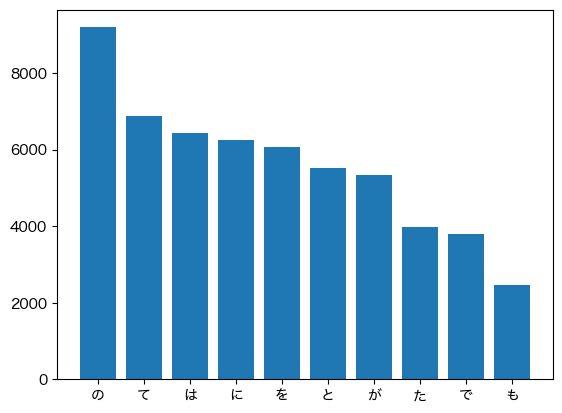

In [8]:
words, counts = zip(*[wc for wc in word_counts[:10]])
# counts = [c for (w, c) in word_counts[:10]]
# how to search fonts: https://www.danyelkoca.com/jp/blog/matplotlib
plt.rcParams['font.family'] = "Hiragino Sans"
plt.bar(words, counts)

### 37. 「猫」と共起頻度の高い上位 10 語


[('の', 75), ('だ', 41), ('は', 36), ('に', 28), ('が', 27), ('と', 27), ('、', 25), ('を', 10), ('も', 9), ('で', 9)]


<BarContainer object of 10 artists>

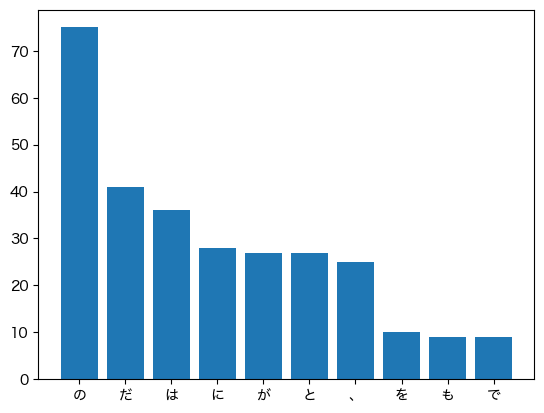

In [9]:
freqs = defaultdict(lambda: 0)

for sentence in sentence_list:
    for i, morpheme in enumerate(sentence):
        if not morpheme["pos"] in ["記号"]:
            if morpheme["base"] == "猫":
                if i >= 1:
                    freqs[sentence[i-1]["base"]] += 1
                if i + 1 < len(sentence):
                    freqs[sentence[i+1]["base"]] += 1

freqs_items = sorted(list(freqs.items()), key=lambda x: -x[1])
print(freqs_items[:10])
plt.bar(*list(zip(*freqs_items[:10])))

### 38. ヒストグラム


[]

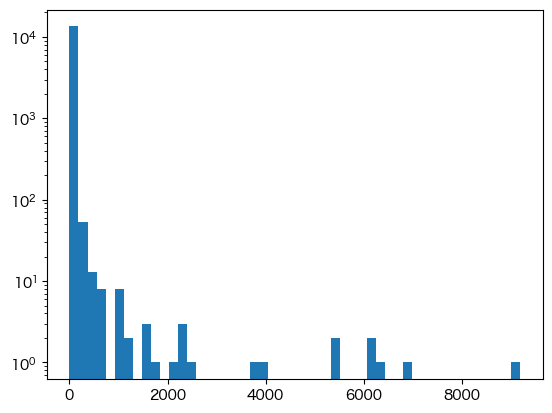

In [10]:
word_count_dict = defaultdict(lambda: 0)

for sentence in sentence_list:
    for morpheme in sentence:
        if morpheme["pos"] not in ["記号", "空白", "フィラー", "その他"]:
            word_count_dict[morpheme["surface"]] += 1

word_counts = sorted(list(word_count_dict.items()), key=lambda x: -x[1])

counts = [c for (w, c) in word_counts]
plt.hist(counts, log=True, bins=50)
plt.plot()

### 39. Zipf の法則


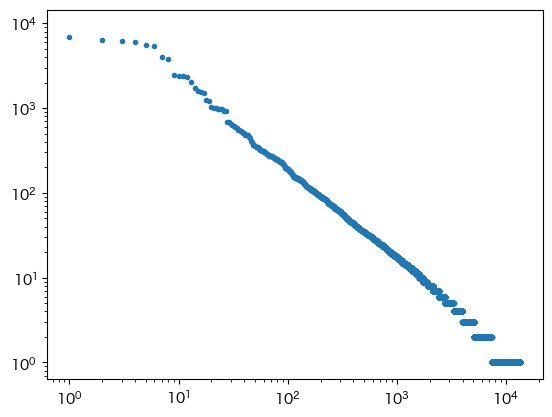

In [11]:
word_count_dict = defaultdict(lambda: 0)

for sentence in sentence_list:
    for morpheme in sentence:
        if not morpheme["pos"] in ["記号"]:
            word_count_dict[morpheme["surface"]] += 1

word_counts = sorted(list(word_count_dict.items()), key=lambda x: -x[1])

counts = [c for (w, c) in word_counts]
plt.plot(counts, ".")
plt.xscale('log')
plt.yscale('log')